In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
from sklearn import datasets, linear_model
%matplotlib inline

In [3]:
df = pd.read_excel('C:/Users/RicardoEsquivel/Desktop/Estadistica/Ejercicio_2.4.xlsx')
df.head()

,Observación,Tasa,Casas
0,1,12.30,196
1,2,10.50,285
2,3,15.60,125
3,4,9.35,225
4,5,10.50,248


In [4]:
#Reportabilidad de estadísticas
df.describe()

,Observación,Tasa,Casas
count,10.00000,10.000000,10.000000
mean,5.50000,11.765000,196.800000
std,3.02765,2.522791,79.268601
min,1.00000,8.700000,102.000000
25%,3.25000,9.637500,116.750000
50%,5.50000,11.250000,210.500000
75%,7.75000,13.725000,260.750000
max,10.00000,15.600000,303.000000


# Gráfico de dispersión

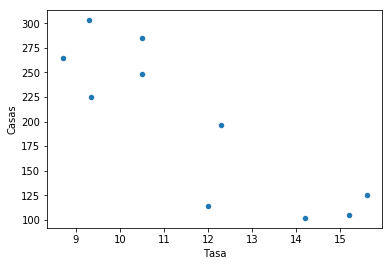

In [5]:
#Grafico de dispersión
df.plot.scatter('Tasa', 'Casas')

# Estimación de la recta de regresión con intercepto

In [21]:
lr = linear_model.LinearRegression()

In [22]:
X = df['Tasa'].values.reshape(-1,1)
y = df['Casas'].values.reshape(-1,1)

In [23]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
slope = lr.coef_
intercept = lr.intercept_

print ('La recta de regresión es: y = %f + %f * X'%(lr.intercept_, slope))

La recta de regresión es: y = 516.530143 + -27.176383 * X


### La recta de regresión es: y = 516.530143 - 27.176383 * X

# Estimación de la recat de regresión sin intercepto

In [27]:
#fit_intercept=False
lr = linear_model.LinearRegression(fit_intercept=False)

In [28]:
X = df['Tasa'].values.reshape(-1,1)
y = df['Casas'].values.reshape(-1,1)

In [29]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [30]:
slope = lr.coef_
intercept = lr.intercept_

print ('La recta de regresión es: y = %f + %f * X'%(lr.intercept_, slope))

La recta de regresión es: y = 0.000000 + 14.982908 * X


## La recta de regresión es: y = 0.000000 + 14.982908 * X

# Tabla ANOVA Modelo con intecepto

In [50]:
#TABLA ANOVA
resultado = smf.ols('Casas ~ Tasa', data=df).fit()
#resultado.summary()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                  Casas   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     23.76
Date:                Wed, 12 Jun 2019   Prob (F-statistic):            0.00123
Time:                        12:28:54   Log-Likelihood:                -50.498
No. Observations:                  10   AIC:                             105.0
Df Residuals:                       8   BIC:                             105.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    516.5301     66.944      7.716      0.0

C:\Users\RicardoEsquivel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# MSE del error con intercepto

In [51]:
resultado.mse_resid

1780.8675263288842

# Tabla ANOVA Modelo sin intercepto

In [48]:
#TABLA ANOVA
resultado = smf.ols('Casas ~ Tasa-1', data=df).fit()
#resultado.summary()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                  Casas   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     24.21
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           0.000824
Time:                        12:27:09   Log-Likelihood:                -61.164
No. Observations:                  10   AIC:                             124.3
Df Residuals:                       9   BIC:                             124.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tasa          14.9829      3.045      4.921      0.0

C:\Users\RicardoEsquivel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# MSE del Error sin Intercepto

In [49]:
resultado.mse_resid

13363.376820743713

# Coeficiente de correlación y valor P

In [52]:
st.pearsonr(df['Tasa'].values, df['Casas'].values)

(-0.8649114669730243, 0.0012338275263204122)

# Regresión, Intervalo de confianza y de predicción

In [13]:
x_val = np.linspace(df['Tasa'].min(), df['Tasa'].max(), 100)
pr = resultado.get_prediction({'Tasa': x_val})

Text(0,0.5,'Número de casas vendidas en una gran ciudad en 10 meses')

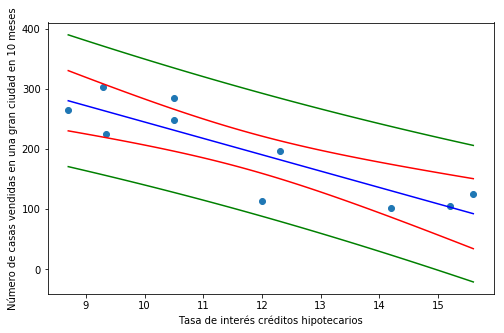

In [16]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.scatter(df['Tasa'].values, df['Casas'].values)
ax.plot(x_val,pr.conf_int(obs=True), color='green')
ax.plot(x_val,pr.conf_int(), color='red')
ax.plot(x_val,pr.predicted_mean, color='blue')
ax.set_xlabel('Tasa de interés créditos hipotecarios')
ax.set_ylabel('Número de casas vendidas en una gran ciudad en 10 meses')

# Análisis de los residuos

In [25]:
resultado.resid

0    13.739365
1    53.821876
2    32.421428
3   -37.430964
4    16.821876
5    39.210216
6   -15.095613
7   -28.625508
8     1.550875
9   -76.413550
dtype: float64

In [26]:
resultado.resid_pearson

array([ 0.32557485,  1.27539004,  0.76827435, -0.88698282,  0.39861957,
        0.92914487, -0.35771319, -0.67832433,  0.03675031, -1.81073364])

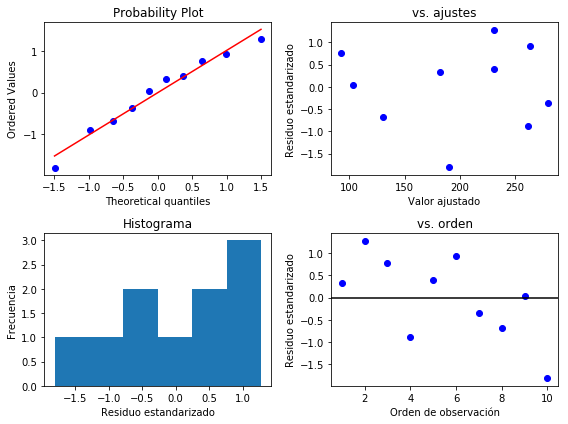

In [63]:
# figura que tendrá los gráficos
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(221)
st.probplot(resultado.resid_pearson, plot=ax)

ax = fig.add_subplot(222)
ax.scatter(resultado.fittedvalues, resultado.resid_pearson, color='blue')
ax.set_xlabel('Valor ajustado')
ax.set_ylabel('Residuo estandarizado')
ax.set_title('vs. ajustes')

ax = fig.add_subplot(223)
ax.hist(resultado.resid_pearson, bins=6)
ax.set_xlabel('Residuo estandarizado')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma')

ax = fig.add_subplot(224)
ax.scatter(df['Observación'], resultado.resid_pearson, color='blue')
ax.set_xlabel('Orden de observación')
ax.set_ylabel('Residuo estandarizado')
ax.set_title('vs. orden')
plt.axhline(0, color = 'Black')

plt.tight_layout()